# VGGNet 응용

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [2]:
vgg16 = VGG16()
vgg16.summary() # 16 layer

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

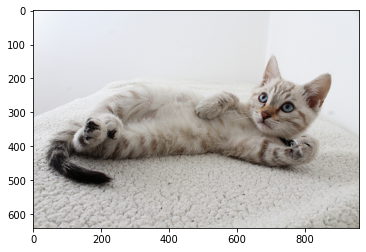

In [6]:
img = Image.open('고양이1.jpg')
plt.imshow(img);

### 1.1 이미지 축소(resize)

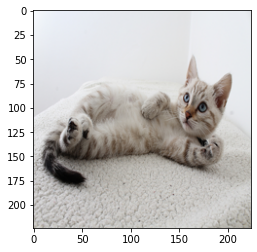

In [11]:
img = img.resize((224, 224))    # Pillow의 resize를 이용함
plt.imshow(img);

### 이미지 예측

In [16]:
np.array(img).shape

(224, 224, 3)

In [17]:
yhat = vgg16.predict(np.array(img).reshape(1, 224, 224, 3)) #predict는 여러 장이 들어온다는 가정 하에 진행
label = decode_predictions(yhat)
yhat.shape, label

49152/35363 [=========================================] - 0s 0us/step


((1, 1000),
 [[('n02124075', 'Egyptian_cat', 0.59825814),
   ('n02123045', 'tabby', 0.27758512),
   ('n02127052', 'lynx', 0.052122638),
   ('n02123159', 'tiger_cat', 0.031656306),
   ('n02123394', 'Persian_cat', 0.00767142)]])

## 1.2 이미지 센터링
- 이미지를 중앙으로 위치하여 자르기
- 저번에 만든 함수 불러오기

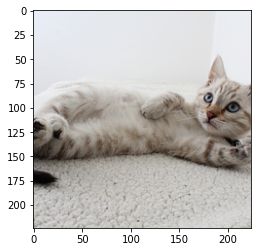

In [21]:
from image_util import center_image

img = Image.open('고양이1.jpg')
img = center_image(img, src_format = 'Pillow', dst_format = 'Pillow')
plt.imshow(img);

In [22]:
yhat = vgg16.predict(np.array(img).reshape(1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02124075', 'Egyptian_cat', 0.46680036),
   ('n02127052', 'lynx', 0.2944528),
   ('n02123045', 'tabby', 0.15028395),
   ('n02123159', 'tiger_cat', 0.02837771),
   ('n03887697', 'paper_towel', 0.018058674)]])